# Implementation 



In [1]:
import torch
from torch import nn
from d2l import torch as d2l

Implement an MLP
with one hidden layer and 256 hidden units

In [2]:
class MLPScratch(d2l.Classification):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

Implement the ReLU activation

In [3]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

Implement our model

In [4]:
@d2l.add_to_class(MLPScratch)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

The training loop for MLPs
is exactly the same as for softmax regression

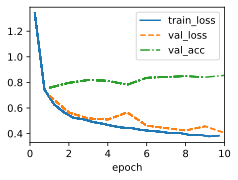

In [5]:
model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

The hidden layer

In [6]:
class MLP(d2l.Classification):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(),
                                 nn.Linear(num_inputs, num_hiddens),
                                 nn.ReLU(),
                                 nn.Linear(num_hiddens, num_outputs))

The training loop

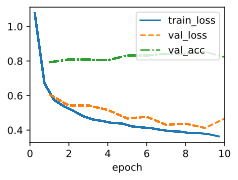

In [7]:
model = MLP(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
trainer.fit(model, data)